## Problem Statement


You are a data scientist at a management consulting firm specializing in workplace efficiency and employee productivity. You have been provided with a dataset named **"employees_work_hours_data.csv"**, containing detailed records of employees’ work hours and related attributes in a corporate setting. The dataset includes the following columns:

- **employee_id:** A unique identifier for each employee.
- **department:** The department where the employee works (e.g., Sales, IT, HR).
- **remote_working:** Indicates whether the employee is working remotely (Yes/No).
- **hours_worked_per_day:** The average number of hours the employee works per day.

**Import Necessary Libraries**

In [3]:
import pandas as pd

### Task1: Importing and Examining the Dataset

1. Import the data from the "employees_work_hours_data.csv" file.
2. display the number of rows and columns. 
3. Display the first few rows of the dataset to get an overview.


In [4]:
df = pd.read_csv("employees_work_hours_data.csv")
print(df.shape)
df.head()

(2800, 4)


,employee_id,department,remote_working,hours_worked_per_day
0,E0001,HR,No,10.1
1,E0002,HR,No,8.5
2,E0003,IT,Yes,9.2
3,E0004,Marketing,No,10.7
4,E0005,Marketing,Yes,10.2


### Task2: Statistical Measures of Work Hours

Compute fundamental statistical measures for the 'hours_worked_per_day' column.
- **Calculate the Mean**: Average number of hours worked per day by the employees.
- **Compute the Standard Deviation**: The amount of variation or dispersion in the daily work hours.

In [6]:
mean_hours_worked= df["hours_worked_per_day"].mean()
std_hours_worked = df["hours_worked_per_day"].std()

print(f"Mean hours worked: {round(mean_hours_worked,2)}\nStd hours worked: {round(std_hours_worked,2)}")

Mean hours worked: 7.98
Std hours worked: 1.34


### Task3: Calculating Z-Scores for Outlier Detection

- **Compute Z-Scores:** For each entry in the 'hours_worked_per_day' column, calculate its Z-score. The Z-score represents how many standard deviations a value is from the mean, which is crucial for identifying outliers.

In [12]:
#z score = (x-mean)/std


def get_zscore_hours(series):
    '''Calculate z-score for a given pandas Series'''
    z_score_hours = round((series - mean_hours_worked) / std_hours_worked, 2)
    return z_score_hours

df["z_score_hours"] = get_zscore_hours(df["hours_worked_per_day"])

df.head()

,employee_id,department,remote_working,hours_worked_per_day,z_score_hours
0,E0001,HR,No,10.1,1.59
1,E0002,HR,No,8.5,0.39
2,E0003,IT,Yes,9.2,0.91
3,E0004,Marketing,No,10.7,2.03
4,E0005,Marketing,Yes,10.2,1.66


### Task4: Removing Outliers Based on Z-Scores

- Identify and exclude rows where the 'hours_worked_per_day' Z-score is less than -3 or greater than +3, thus removing outliers from the dataset.

In [15]:
outliers = df[(df["z_score_hours"] > 3) | (df["z_score_hours"] < -3)]
outliers

,employee_id,department,remote_working,hours_worked_per_day,z_score_hours
153,E0154,Sales,No,13.8,4.35
220,E0221,IT,Yes,14.6,4.95
251,E0252,HR,No,1.6,-4.78
288,E0289,Sales,No,15.7,5.78
496,E0497,Marketing,Yes,1.2,-5.07
630,E0631,Sales,No,2.4,-4.18
712,E0713,HR,No,17.9,7.42
757,E0758,Marketing,Yes,14.1,4.58
806,E0807,Marketing,Yes,14.6,4.95
881,E0882,Sales,No,2.6,-4.03


### Task5: Standard Normal Distribution Post-Outlier Removal

-  Construct a visual plot of the Standard Normal Distribution using the Z-scores from the 'hours_worked_per_day' data, ensuring to include only the data after outlier removal. 

In [16]:
cleaned_df = df[(df["z_score_hours"] <= 3) & (df["z_score_hours"] >= -3)]
cleaned_df

,employee_id,department,remote_working,hours_worked_per_day,z_score_hours
0,E0001,HR,No,10.1,1.59
1,E0002,HR,No,8.5,0.39
2,E0003,IT,Yes,9.2,0.91
3,E0004,Marketing,No,10.7,2.03
4,E0005,Marketing,Yes,10.2,1.66
...,...,...,...,...,...
2795,E2796,Marketing,No,7.6,-0.29
2796,E2797,HR,No,6.9,-0.81
2797,E2798,Sales,Yes,8.4,0.31
2798,E2799,IT,Yes,6.3,-1.26


In [17]:
import seaborn as sns

<Axes: xlabel='hours_worked_per_day', ylabel='Count'>

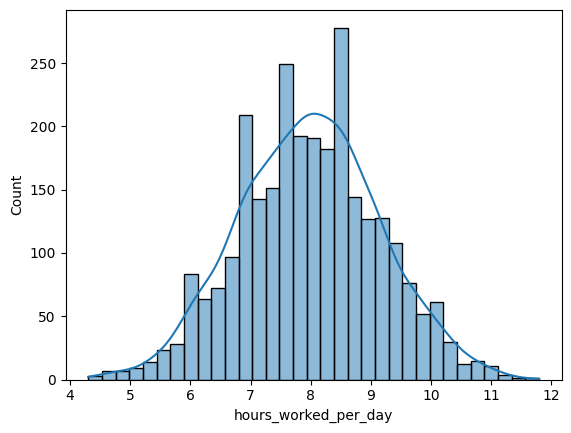

In [18]:
sns.histplot(cleaned_df["hours_worked_per_day"],kde=True)